<a href="https://colab.research.google.com/github/sufawan20/Bike-Sharing-Demand-Prediction-Regression-project/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Bike Sharing Demand Prediction**



##### **Project Type**    - Regression
Contribution - Team

**Team Member 1** - Tousif Sheikh

**Team Member 2** - Mohammad Sufawan

**Team Member 3** - Udit kumar


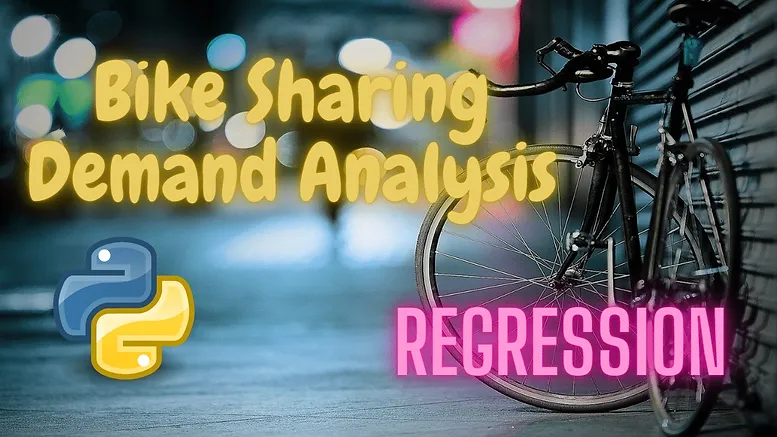

# **GitHub Link -**

Tousif Sheikh- https://github.com/tousif99/Bike_Sharing_Demand_Prediction/tree/main

Mohammad Sufawan-https://github.com/sufawan20/Bike-Sharing-Demand-Prediction-Regression-project/blob/main/Bike_Sharing_Demand_Prediction.ipynb

# **Project Summary -**

This project aims to enhance the mobility and convenience of the public through bike-sharing programs in metropolitan areas. One of the main challenges is maintaining a consistent supply of bikes for rental. Bike-sharing systems are automated and enable people to rent and return bikes at various locations. The project focuses on utilizing historical data on factors such as temperature and time to predict the demand for the bike-sharing program in Seoul.

* There were approximately 8760 records and 14 attributes in the dataset.
* We started by importing the dataset, and necessary libraries and conducted exploratory data analysis (EDA).
* Outliers and null values were removed from the raw data and treated. Data were transformed to ensure that it was compatible with machine learning models.
* We handled target class imbalance using square root normalization.
* Then finally cleaned and scaled data was sent to 11 various models, the metrics were made to evaluate the model, and we tuned the hyperparameters to make sure the right parameters were being passed to the model.
* When developing a machine learning model, it is generally recommended to track multiple metrics because each one highlights distinct aspects of model performance. We are, focusing more on the R2 score and RMSE score.
*  The R2 score is scale-independent, which means that it can be used to compare models that are fit to different target variables or to target variables that have different units of measurement. This is particularly useful when comparing models for different problems, as it allows for a direct comparison of the performance of the models, regardless of the scale of the target variable

# **Index**

1.   Problem Statement
2.   Know Your Data
3.   Understanding Your Variables
4.   EDA
5.   Data Cleaning
6.   Feature Engineering
7.   Model Building
8.   Model Implementaion.
9.   Conclusion

# **Let's Begin !**

## **1. Problem Statement**

Many metropolitan areas now offer bike rentals to improve mobility and convenience. Ensuring timely access to rental bikes is critical to reducing wait times for the public, making a consistent supply of rental bikes a major concern. The expected hourly bicycle count is particularly crucial in this regard.

Bike sharing systems automate membership, rentals, and bike returns through a network of locations. Individuals can rent bikes from one location and return them to another or the same location, as needed. Membership or request facilitates bike rentals, and the process is overseen by a citywide network of automated stores.

This dataset aims to predict the demand for Seoul's Bike Sharing Program based on historical usage patterns, including temperature, time, and other data.

### **Business Context**

Estimating the number of required bikes at any given time and day is a critical business concern. Having fewer bikes results in resource wastage (in terms of bike maintenance and the land/bike stand required for parking and security), while having more bikes can lead to revenue loss, ranging from immediate loss due to a lower number of customers to potential long-term loss due to a loss of future customers. Therefore, it is essential for bike rental businesses to have an estimate of demand to function effectively.

## **2. Know Your Data**

### Import Libraries

In [ ]:
# Import Libraries and modules

# libraries that are used for analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# to import datetime library
from datetime import datetime
import datetime as dt

# libraries used to pre-process
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


# libraries used to implement models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# libraries to evaluate performance
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

# to set max column display
pd.pandas.set_option('display.max_columns',None)

### Dataset Loading

In [ ]:
# let's mount the google drive first
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load the Seol bike data set from the drive
bike_df = pd.read_csv('/content/SeoulBikeData.csv',encoding ='latin')

### Dataset First View

In [ ]:
# Viewing the top 5 rows to take a glimpse of the data
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns Count

In [ ]:
# Dataset Rows & Columns
bike_df.shape

(8760, 14)

In [ ]:
print(f'number of rows : {bike_df.shape[0]}  \nnumber of columns : {bike_df.shape[1]}')

number of rows : 8760  
number of columns : 14


### Dataset Information

In [ ]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

We have 14 columns. most of them are numerical except Seasons, Holiday, Functioning Days, and Date

We have to convert the Date column into the DateTime datatype.

### Duplicate Values

**How important is it to get rid of duplicate records in my data?**

When there are identical instances in a dataset, it is referred to as "duplication." Such duplication could occur due to erroneous data entry or data collection procedures. Eliminating duplicate data from the dataset saves time and money by avoiding the repetition of the same data sent to the machine learning model.

In [ ]:
# Dataset Duplicate Value Count
# Checking Duplicate Values
value = len(bike_df[bike_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


We found that there is no duplicate entry in the above data.

### Missing Values/Null Values

**Why dealing with missing values is necessary?**

Real-world data often contains numerous missing values, which can be due to data corruption or other factors. As many machine-learning algorithms do not support missing values, it is necessary to handle them during the dataset pre-processing stage. Thus, the first step in dealing with missing data is to identify the missing values.

In [ ]:
# Missing Values/Null Values Count
print(bike_df.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


<Axes: >

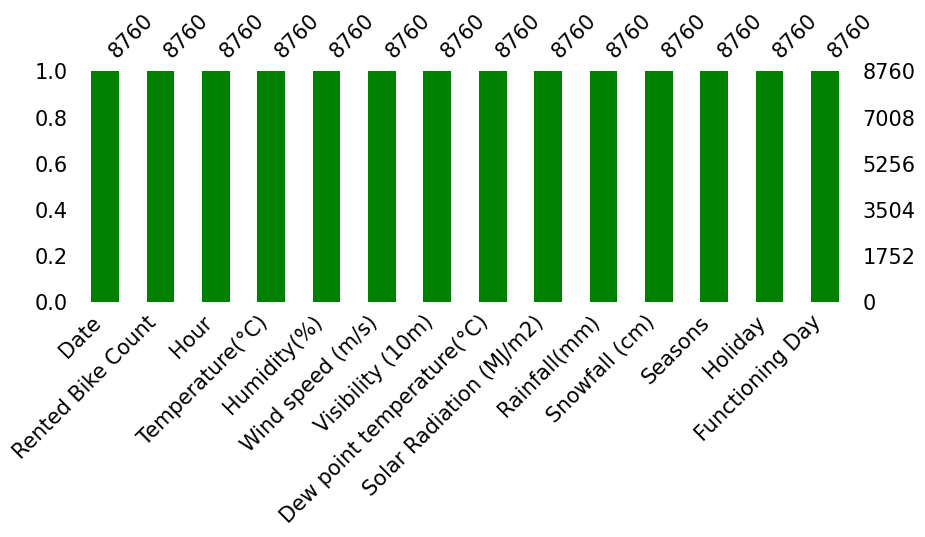

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.bar(bike_df, color='green',sort='ascending', figsize=(10,3), fontsize=15)

<Axes: >

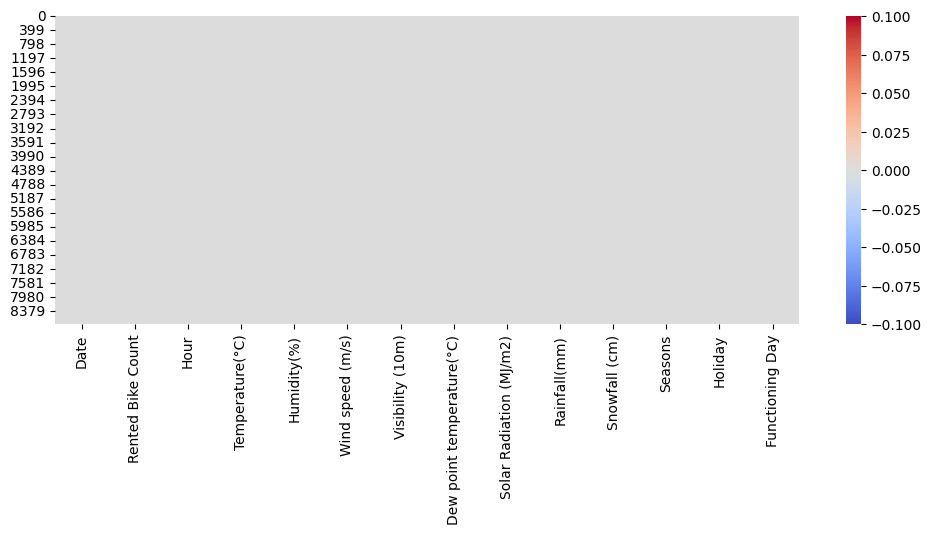

In [ ]:
# Visualizing the missing values using Heatmap
plt.figure(figsize=(12,4))
sns.heatmap(bike_df.isna(), cmap = 'coolwarm')

From the above command, we noticed that every column has 0 null values. This seems to be clean data and there is no missing data in any of the rows and columns.

### What did you know about your dataset?

The dataset provided contains 14 columns and 8760 rows and does not have any missing or duplicate values.

The goal is to predict the demand for bike-sharing using this dataset, which is sourced from the bike-sharing services market. Demand prediction involves analytical studies on the probability of a customer using bike-sharing services, with the aim of understanding and managing demand and supply equilibrium throughout the day.

## **3. Understanding Your Variables**

###  Columns

In [ ]:
# Dataset Columns
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

###  Statistical Summary###  

In [ ]:
# Dataset Describe
bike_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


###  Variables Description

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

<b>Attribute Information: </b>

* **Date :**year-month-day
* **Rented Bike count :**Count of bikes rented at each hour
* **Hour :**Hour of the day
* **Temperature :**Temperature in Celsius
* **Humidity :**%
* **Windspeed :**m/s
* **Visibility :**10m
* **Dew point temperature :**Celsius
* **Solar radiation :**MJ/m2
* **Rainfall :**mm
* **Snowfall :**cm
* **Seasons :**Winter, Spring, Summer, Autumn
* **Holiday :**Holiday/No holiday
* **Functional Day :**NoFunc(Non Functional Hours), Fun(Functional hours)

### Unique Values

In [ ]:
# print the unique value
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [ ]:
# Check Unique Values for each variable.
for i in bike_df.columns.tolist():
  print("No. of unique values in ",i,"is",bike_df[i].nunique())

No. of unique values in  Date is 365
No. of unique values in  Rented Bike Count is 2166
No. of unique values in  Hour is 24
No. of unique values in  Temperature(°C) is 546
No. of unique values in  Humidity(%) is 90
No. of unique values in  Wind speed (m/s) is 65
No. of unique values in  Visibility (10m) is 1789
No. of unique values in  Dew point temperature(°C) is 556
No. of unique values in  Solar Radiation (MJ/m2) is 345
No. of unique values in  Rainfall(mm) is 61
No. of unique values in  Snowfall (cm) is 51
No. of unique values in  Seasons is 4
No. of unique values in  Holiday is 2
No. of unique values in  Functioning Day is 2


### Observations:

* We are focusing on several key columns of our dataset, including  'Hour', 'Holiday', 'Functioning Day', 'Rented Bike Count', 'Temperature(°C)', and 'Seasons', as they contain a wealth of information.
* By utilizing these features, we plan to create a regression model and implement various regression algorithms.
* There is a column 'Hour' which might be considered a categorical feature or maybe a numerical feature based on the data we will try both and see the result difference.

## **4. EDA**

#### **What is EDA?**
* Exploratory Data Analysis (EDA) is a critical step in the data science process that involves analyzing and understanding the data. The primary objective of EDA is to gain insights into the data, uncover patterns, and detect relationships and trends. This iterative process helps identify outliers, missing values, and other issues that may impact the analysis and modeling of the data.


### **4.1 Creating Some New Features**

In [ ]:
# Renaming complex columns name for the sake of simplicity    **(Not a necessary step to do)**
bike_df=bike_df.rename(columns={'Rented Bike Count':'rented_bike_count',
                                'Date':'date',
                                'Hour':'hour',
                                'Seasons':'seasons',
                                'Holiday':'holiday',
                                'Temperature(°C)':'temperature',
                                'Humidity(%)':'humidity',
                                'Wind speed (m/s)':'wind_speed',
                                'Visibility (10m)':'visibility',
                                'Dew point temperature(°C)':'dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'solar_radiation',
                                'Rainfall(mm)':'rainfall',
                                'Snowfall (cm)':'snowfall',
                                'Functioning Day':'functioning_day'})

##### Breaking down date column

In [ ]:
# Splitting Date into year, month, day & day_name
bike_df.date = pd.to_datetime(bike_df.date)

bike_df['day'] = bike_df['date'].dt.day
bike_df['month'] = bike_df['date'].dt.month
bike_df['year'] = bike_df['date'].dt.year
bike_df['weekday'] = bike_df['date'].dt.day_name()

# droping Date column
bike_df.drop('date', axis=1, inplace=True)

In [ ]:
bike_df.hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

The hours of the day follow a clear sequence, with 9 am being closer to 10 am than it is to 8 am, and farther from 6 pm. This feature can be classified as a discrete ordinal variable. We will consider the hour as a categorical value and transform it into a numerical value to see if there is any difference in the results.

In [ ]:
def session(x):

    '''
    For exploratory data analysis (EDA) purposes, the "Hour" column can be converted into categorical variables
    such as "Morning", "Noon", and "Night", without altering the existing label encoding format of the "Hour" column.
    This conversion is not necessary for model training.
    '''

    if x>4 and x<=8:
        return 'Early Morning'
    elif x>8 and x<=12:
        return 'Morning'
    elif x>12 and x<=16:
        return 'Afternoon'
    elif x>16 and x<=20:
        return 'Evening'
    elif x>20 and x<=24:
        return 'Night'
    elif x<=4:
        return 'Late Night'

#apply funtion to make new category column
bike_df['session'] = bike_df['hour'].apply(session)

### **4.2 Column: 'rented_bike_count'**

In [ ]:
print(f'Min Count: {bike_df.rented_bike_count.min()}')
print(f'Max Count: {bike_df.rented_bike_count.max()}')

Min Count: 0
Max Count: 3556


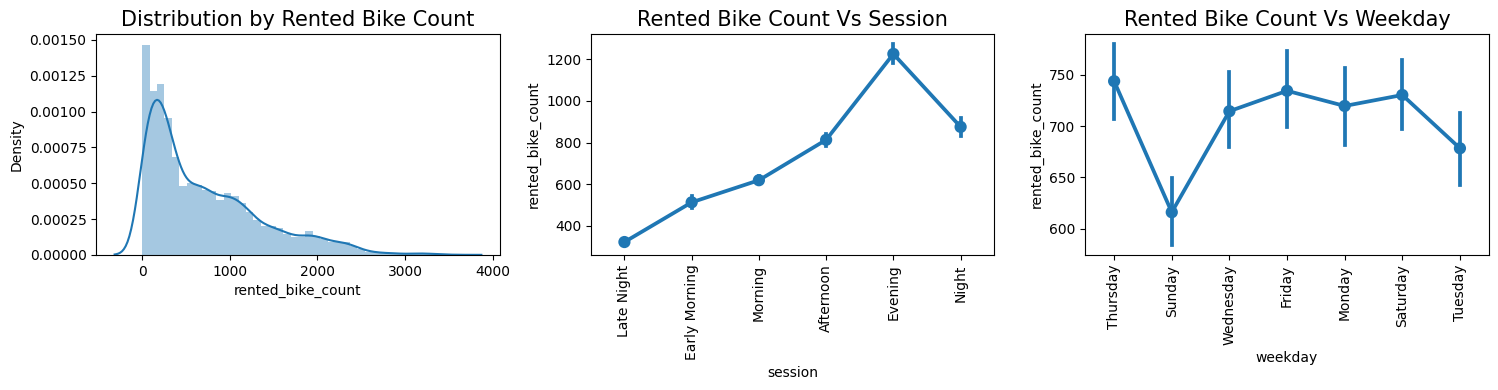

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Distribution analysis
dist = sns.distplot(bike_df['rented_bike_count'], ax=ax[0])
dist.set_title('Distribution by Rented Bike Count', size=15)

# Bi-variate analysis
# Rented Bike Count Vs Session
point = sns.pointplot(data=bike_df, x='session', y='rented_bike_count', ax=ax[1])
point.set_title('Rented Bike Count Vs Session', size=15)
# Set x-ticks rotation to 90 degrees
point.set_xticklabels(point.get_xticklabels(), rotation=90)

# Bi-variate analysis
# Rented Bike Count Vs Weekday
point = sns.pointplot(data=bike_df, x='weekday', y='rented_bike_count', ax=ax[2])
point.set_title('Rented Bike Count Vs Weekday', size=15)
# Set x-ticks rotation to 90 degrees
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Observation:**
* Distribution of Rented Bike Count is positively skewed and has many outliers. We will treat it later.
* Demand for rented bikes increases in the evening.
* There is the least demand for the rented bike on Sunday.

### **4.3 Column: 'hour'**

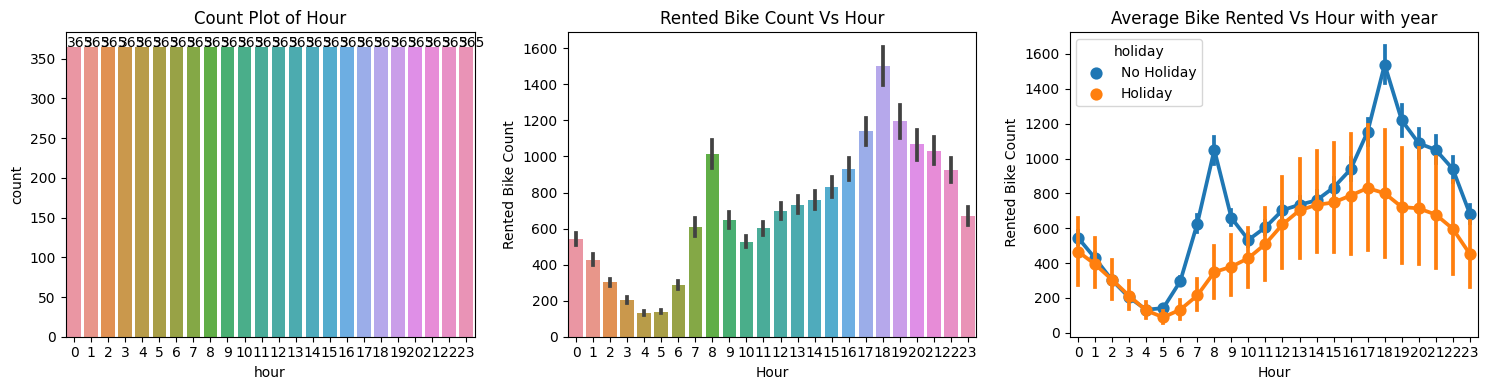

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
count = sns.countplot(data=bike_df, x='hour', ax=ax[0])
count.set_title('Count Plot of Hour')

# adding value count on the top of bar
for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Bi-variate analysis
# Rented Bike Count Vs Hour
bar = sns.barplot(data=bike_df, x='hour', y='rented_bike_count', ax = ax[1])
bar.set(xlabel='Hour', ylabel='Rented Bike Count', title='Rented Bike Count Vs Hour')

# Multi-variate analysis
point = sns.pointplot(data=bike_df, x='hour', y='rented_bike_count', hue='holiday', ax= ax[2])
point.set(xlabel='Hour', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Hour with year')

plt.tight_layout()
plt.show()

**Observation:**
* Every hour has an equal number of counts in the dataset.
* Demand for rented bike count is higher at 8 AM and 6 PM indicating a high demand during business hours.
* Rented Bike Count follows 2 patterns one for holiday and another for no holiday.
* Holiday: The first pattern is where there is a peak in the rentals at around 8 am and another at around 6 pm. These correspond to local bikers who typically go to work on a working day, Monday to Friday.
* Non-Working Day: Second pattern where there are more or less uniform rentals across the day with a peak at around noon time. These correspond to probable tourists who typically are casual users who rent/drop off bikes uniformly during the day and tour the city on nonworking days which typically are Saturday and Sunday

### **4.4 Column: 'temperature'**

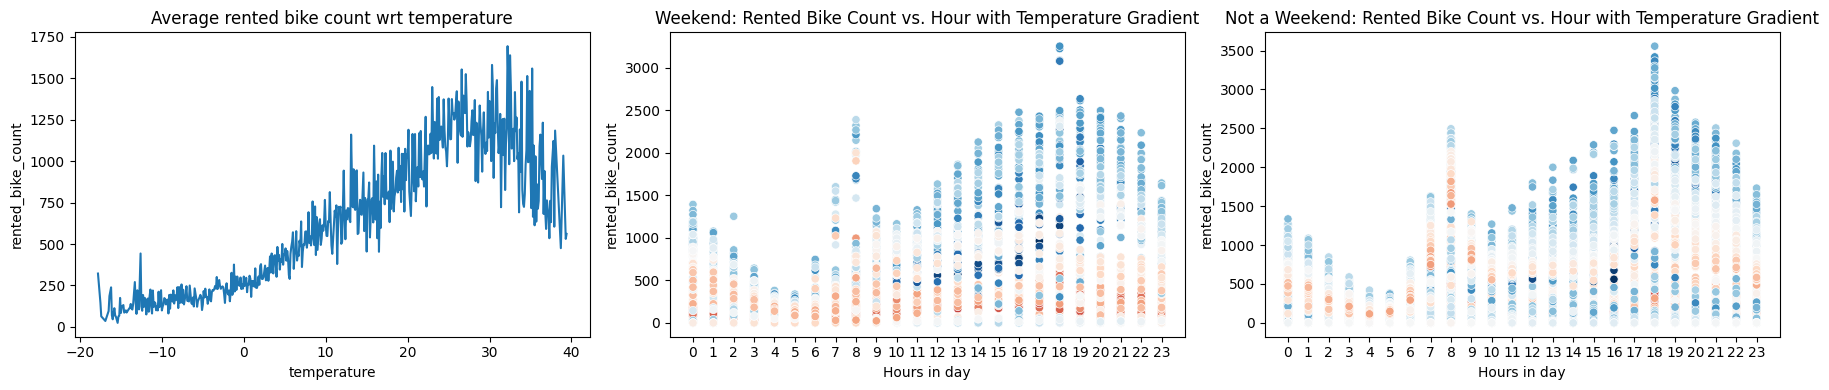

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(18,4))

# Univariate analysis
# Dependent Column Value Vs temperature
# group temperature column
temp_wrt_bike_rent_count = bike_df.groupby(['temperature'])['rented_bike_count'].mean().reset_index()

line = sns.lineplot(x = 'temperature', y ='rented_bike_count', data = temp_wrt_bike_rent_count, ax = ax[0])
line.set_title('Average rented bike count wrt temperature')

# Multi-variate analysis
# Dependent Column Value Vs hour with temperature
bike_df_nw = bike_df[(bike_df.weekday != 'Saturday') & (bike_df.weekday != 'Sunday')]
bike_df_w = bike_df[(bike_df.weekday == 'Saturday') | (bike_df.weekday == 'Sunday')]

# Weekend
scatter2 = sns.scatterplot(x=bike_df_w.hour, y=bike_df_w['rented_bike_count'], c=bike_df_w.temperature, cmap="RdBu", ax =ax[1])
scatter2.set(xticks = range(24), xlabel='Hours in day', ylabel='rented_bike_count')
scatter2.set_title('Weekend: Rented Bike Count vs. Hour with Temperature Gradient')

# Not a Weekend
scatter = sns.scatterplot(x=bike_df_nw.hour, y=bike_df_nw['rented_bike_count'], c=bike_df_nw.temperature,cmap="RdBu", ax = ax[2])
scatter.set(xticks = range(24), xlabel='Hours in day', ylabel='rented_bike_count')
scatter.set_title('Not a Weekend: Rented Bike Count vs. Hour with Temperature Gradient')


plt.tight_layout()
plt.show()

**Observation:**
* We can see from the line plot above that the average number of bikes rented with temperature increases steadily, with a slight decrease at the highest temperature.
* People prefer renting bikes in warm environments. Therefore, the demand for bicycles is high if the temperature is sufficiently warm, but extremely hot temperatures are also unsuitable for bike demand.
* However, there is a slight decrease in count if the temperature is too high (the darkest of the blue dots).

### **4.5 Column: 'humidity'**

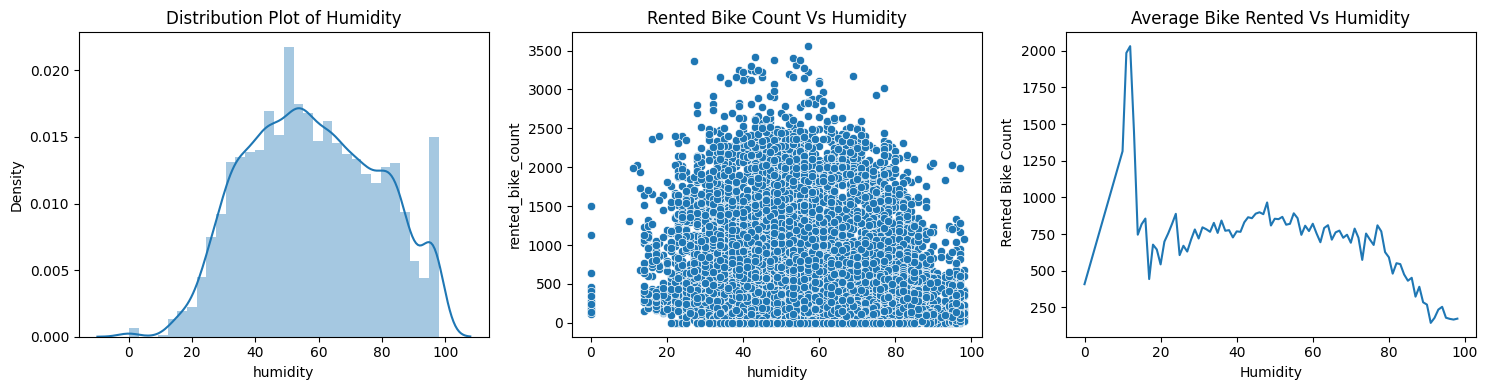

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
dist = sns.distplot(bike_df.humidity, ax = ax[0])
dist.set_title('Distribution Plot of Humidity')

# Bi-variate analysis
# Rented Bike Count Vs Humidity
scatter = sns.scatterplot(data=bike_df, x='humidity', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='humidity', ylabel='rented_bike_count', title='Rented Bike Count Vs Humidity')

# Line Plot
group_wind_speed = bike_df.groupby(['humidity'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data=group_wind_speed, x='humidity', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Humidity', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Humidity')

plt.tight_layout()
plt.show()

**Observation:**
* We can see from the plots above that the average number of bikes rented goes up and down sharply with the peak at around 50. For the number of rented bikes in demand, the most preferred humid environment is 20-90.

### **4.6 Column: 'wind_speed'**

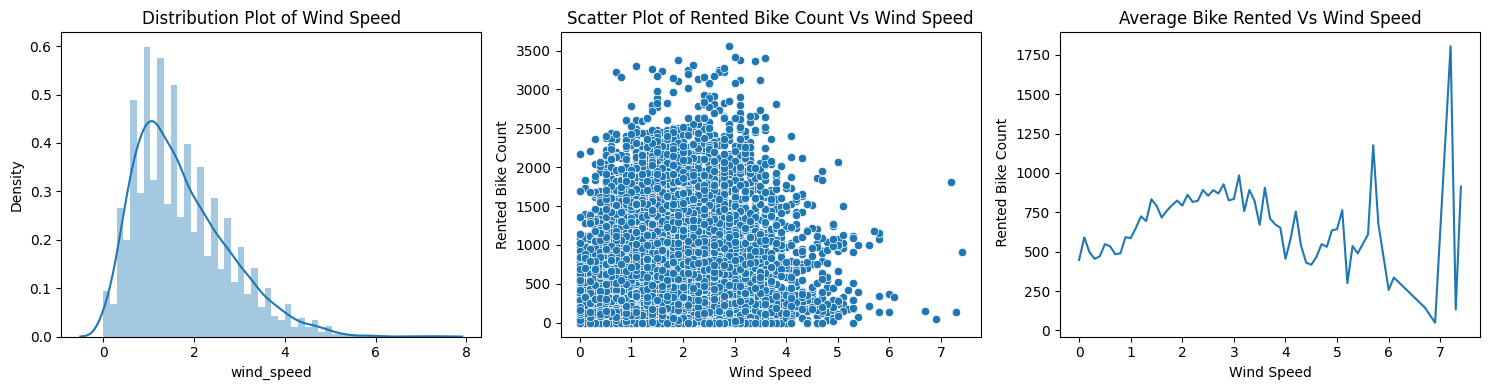

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
dist = sns.distplot(bike_df.wind_speed, ax = ax[0])
dist.set_title('Distribution Plot of Wind Speed')

# Bi-variate analysis
# Rented Bike Count Vs Wind Speed
scatter = sns.scatterplot(data=bike_df, x='wind_speed', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='Wind Speed', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Wind Speed')

# Line Plot
group_wind_speed = bike_df.groupby(['wind_speed'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data=group_wind_speed, x='wind_speed', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Wind Speed', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Wind Speed')

plt.tight_layout()
plt.show()

**Observation:**
* We can see from the distribution plot that wind speed is slightly positively skewed.
* Scatter Plot tells us about the distribution of the wind speed and rented bike count, and how the values of the two variables are related to each other.
* Line plot tells us that people prefer moderate wind but there is a spike at wind speed 7.

### **4.7 Column: 'visibility'**

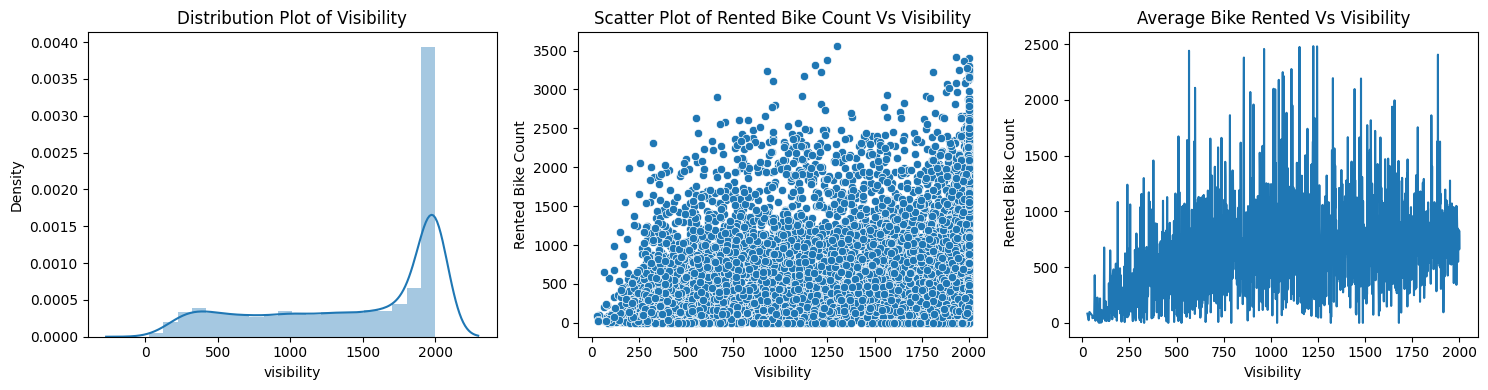

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
dist = sns.distplot(bike_df.visibility, ax = ax[0])
dist.set_title('Distribution Plot of Visibility')

# Bi-variate analysis
# Rented Bike Count Vs Visibility
scatter = sns.scatterplot(data=bike_df, x='visibility', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='Visibility', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Visibility')

# Line Plot
group_visibility = bike_df.groupby(['visibility'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data=group_visibility, x='visibility', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Visibility', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Visibility')

plt.tight_layout()
plt.show()


**Observation:**
* Visibility is highly skewed to the left side.
* We can see from these plots above that as visibility rises, so does rented_bike_count.

### **4.8 Column: 'dew_point_temperature'**

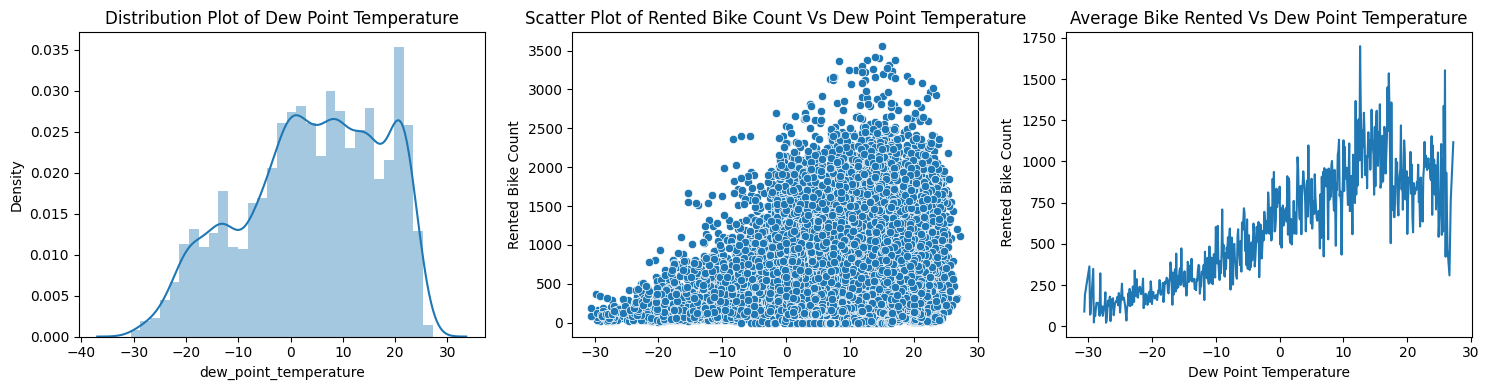

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
dist = sns.distplot(bike_df.dew_point_temperature, ax = ax[0])
dist.set_title('Distribution Plot of Dew Point Temperature')

# Bi-variate analysis
# Rented Bike Count Vs Dew Point Temperature
scatter = sns.scatterplot(data=bike_df, x='dew_point_temperature', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='Dew Point Temperature', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Dew Point Temperature')

# Line Plot
group_dew_point_temperature = bike_df.groupby(['dew_point_temperature'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data = group_dew_point_temperature, x ='dew_point_temperature', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Dew Point Temperature', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Dew Point Temperature')

plt.tight_layout()
plt.show()

**Observation:**
* We can see from the distribution plot that solar radiation is highly skewed to positive.
* The average number of bikes rented goes up with solar radiation.
* Additionally, this column is directly related to the temperature column.

### **4.10 Column: 'rainfall'**